In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hepatitis/hepatitis.csv
/kaggle/input/hepatitis-1/hepatitis_1.csv


In [2]:
train = pd.read_csv("/kaggle/input/hepatitis-1/hepatitis_1.csv", header=None)
train = train[train != "?"]
train.dropna(inplace=True)
#train = pd.get_dummies(train)
train = train.astype("float32")
train

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5,1.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
10,1.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1.0
11,1.0,32.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1.0
12,1.0,41.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1.0
13,1.0,30.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,45.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44.0,4.2,85.0,2.0
143,0.0,49.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.0,70.0,3.5,35.0,2.0
145,1.0,31.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,75.0,173.0,4.2,54.0,2.0
153,1.0,53.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2.0


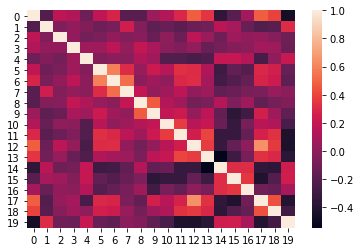

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

matrix = train.corr()
sns.heatmap(matrix, annot=False)

In [4]:
survived = train.loc[:, 0] # 1=die 2=survived
age = train.loc[:, 1]
sex = train.loc[:, 2] # 1=male 2=female
anti = train.loc[:, 4] # 1=no 2=yes
bilirubin = train.loc[:, 14] # decimals
bilirubin = bilirubin.astype("float64")
hist = train.loc[:, 19] # 1=no 2=yes
ascites = train.loc[:, 12]
albumin = train.loc[:, 17]
#data = [survived, sex, steroid]
#df = pd.concat(data, axis=1)
#df
bilirubin.dtypes

dtype('float64')

In [5]:
data_train = [ascites, albumin]

X = pd.concat(data_train, axis=1)
X = pd.get_dummies(X)
y = train.loc[:, 0]
y = y.to_frame()
X

,12,17
5,2.0,4.0
10,2.0,4.4
11,2.0,3.7
12,2.0,3.9
13,2.0,4.9
...,...,...
139,2.0,4.2
143,2.0,3.5
145,2.0,4.2
153,2.0,4.1


In [6]:
#from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import GaussianNB

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#gnb = GaussianNB()
#y_pred = gnb.fit(X_train, y_train).predict(X_test)
#y_pred

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

predictions = model.predict_classes(X)
predictions

Epoch 1/50
6/6 [==============================] - 0s 2ms/step - loss: 1.3513 - accuracy: 0.1964
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 1.1991 - accuracy: 0.1964
Epoch 3/50
6/6 [==============================] - 0s 2ms/step - loss: 1.0654 - accuracy: 0.1964
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9581 - accuracy: 0.1964
Epoch 5/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8793 - accuracy: 0.1964
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 0.8041 - accuracy: 0.2143
Epoch 7/50
6/6 [==============================] - 0s 1ms/step - loss: 0.7435 - accuracy: 0.1250
Epoch 8/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.6429
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.7857
Epoch 10/50
6/6 [==============================] - 0s 1ms/step - loss: 0.6070 - accuracy: 0.8036
Epoch 11/50
6/6 [======================

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [8]:
predictions = model.predict(X_test)
predictions

array([[0.854416  ],
       [0.839715  ],
       [0.8764166 ],
       [0.8447443 ],
       [0.79953563],
       [0.82383543],
       [0.839715  ],
       [0.854416  ],
       [0.854416  ],
       [0.839715  ],
       [0.87225807],
       [0.8447443 ],
       [0.7871264 ],
       [0.79953563],
       [0.8679807 ],
       [0.8447443 ],
       [0.8635825 ],
       [0.8447443 ],
       [0.8496442 ],
       [0.87139213],
       [0.8182745 ],
       [0.81257784],
       [0.854416  ],
       [0.81257784]], dtype=float32)